# EMG preproc Example  

In [11]:
# Import libraries
import aopy
from aopy.data import db
from ipywidgets import interactive, widgets
from datetime import date, datetime, timedelta
import re
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# set up constants
data_dir = '/data/human' #Human raw data directory

preproc_dir = '/data/preprocessed-human' #Human preprocessed data directory

db.BMI3D_DBNAME = 'human' #Human database name

## Identify a single recording with EMG

In [6]:

sessions = db.lookup_sessions(id=2383)
e = sessions[-1]
print(e)
print(e.project)

2025-03-07 11:26:25.049025: test on myo task, id=2383
testing


In [7]:
#Preprocess the data with the entries preprocess function

e.preprocess(data_dir, preproc_dir, overwrite=True)


Updating hdf file with metadata for task entry 2383
/data/human/hdf/test20250307_01_te2383.hdf
{'hdf': 'hdf/test20250307_01_te2383.hdf', 'emg': 'emg/test20250307_01_te2383.hdf'}
processing experiment data...
{'channels': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88]), 'samplerate': 2048.0}


/home/aolab/aj/analyze/aopy/data/bmi3d.py:423: RuntimeWarning: invalid value encountered in divide
  digital_data = (digital_data - np.mean(digital_data, axis=0)) / div


done!
processing emg data...


In [9]:
#Load experiment data
exp_data, exp_metadata = aopy.data.load_preproc_exp_data(preproc_dir, e.subject, e.id, e.date)
#Load the EMG data
emg_data, emg_metadata = aopy.data.load_preproc_emg_data(preproc_dir, e.subject, e.id, e.date)

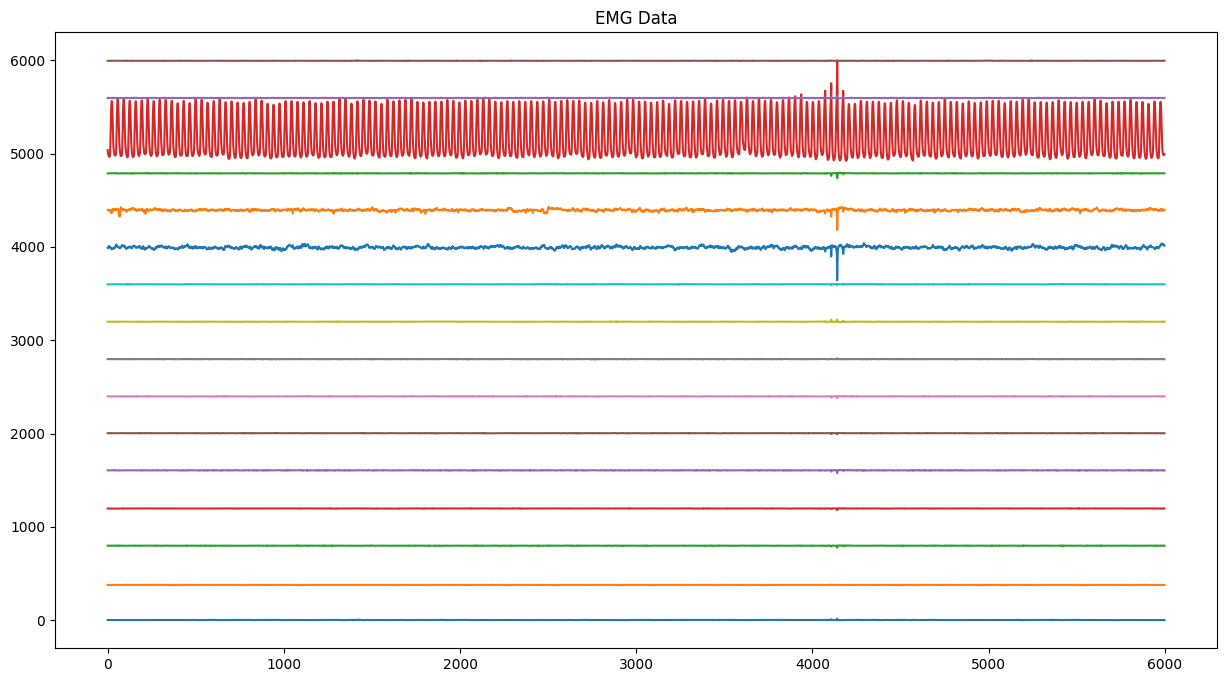

Text(0.5, 1.0, 'EMG Clock Data')

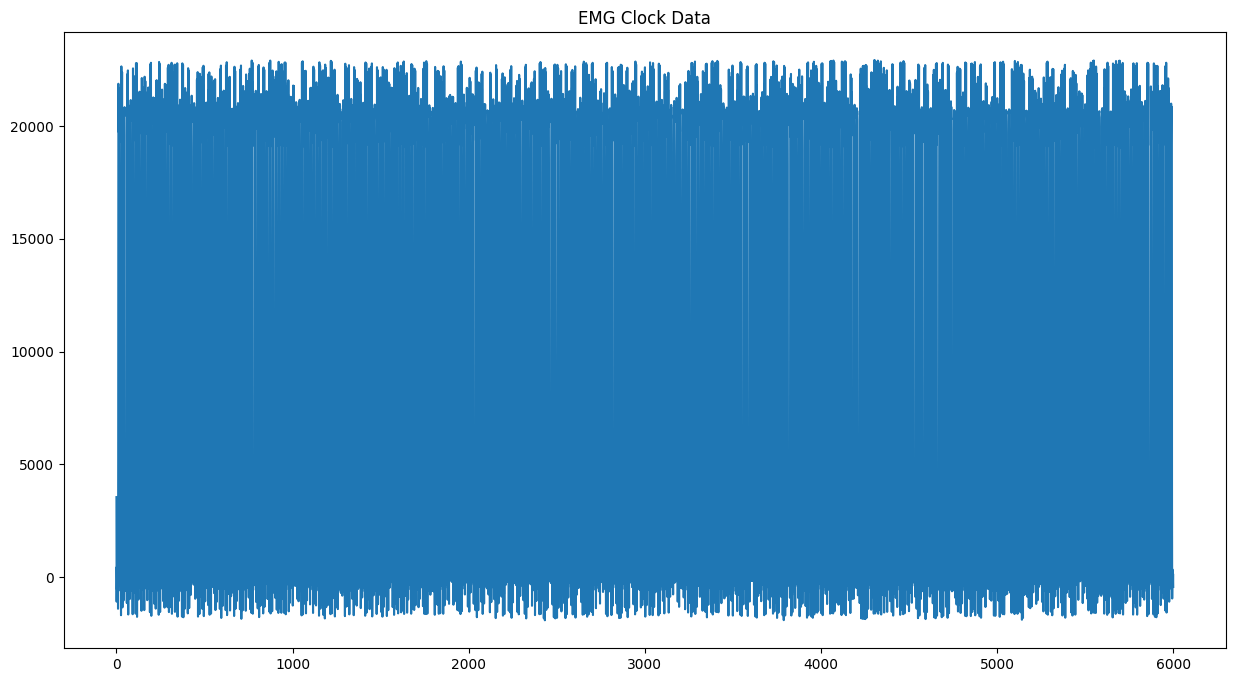

In [21]:
plt.figure(figsize=(15, 8))
for i in np.arange(0, 64, 4):
    plt.plot(emg_data['emg_raw'][4000:10000,i]+100*i)

plt.title('EMG Data')
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(emg_data['emg_clock_raw'][4000:10000])
plt.title('EMG Clock Data')